# Coding Assignment "Gradient Methods"

## 1. Preparation

In [1]:
import numpy as np 
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt 
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from numpy import linalg as LA

## 2. Data

### 2.1 Dataset

In [2]:
# Import the weather measurements.
data = pd.read_csv('Assignment_MLBasicsData.csv')

# We consider each temperature measurement (=a row in dataframe data) 
# as a separate data point.
# Determine the total number of data points stored in csv file.
nrdatapoints = len(data)

# Print out the first data point (first row).
print("First data point:")
print(data.iloc[0])
print("\n******************************\n")

# Here is another data point. 
print("Another data point:")
print(data.iloc[13])
print("\n******************************\n")

# We use normalized values of 
# latitude, longitude, year, mon, day, hour, minute (as float values) 
# as features of a data point.
nrfeatures = 7 

# The code snippet below extracts the features of the first data point (first row in dataframe data).
date_object = datetime.strptime(data['Timestamp'].iloc[0], '%Y-%m-%d %H:%M:%S')

# Extract individual components.
latitude = data["Latitude"].iloc[0]
longitude = data["Longitude"].iloc[0]
year = float(date_object.year)
month = float(date_object.month)
day = float(date_object.day)
hour = float(date_object.hour)
minute = float(date_object.minute)

print("Unnormalized features of the first data point: ")
print(f"Latitude: {latitude}")
print(f"Longitude: {longitude}")
print(f"Year: {year}")
print(f"Month: {month}")
print(f"Day: {day}")
print(f"Hour: {hour}")
print(f"Minute: {minute}")
print("\n******************************\n")

# We choose the temperature as the label (quantity of interest) of a data point.
print("Label of first data point:", data["temp"].iloc[0])

First data point:
Latitude                        69.04277
Longitude                       20.85091
Timestamp            2023-12-31 18:00:00
temp                               -16.5
name         Enontekiö Kilpisjärvi Saana
Name: 0, dtype: object

******************************

Another data point:
Latitude                     69.757
Longitude                    27.012
Timestamp       2023-12-31 13:00:00
temp                          -26.3
name         Utsjoki Kevo Kevojärvi
Name: 13, dtype: object

******************************

Unnormalized features of the first data point: 
Latitude: 69.04277
Longitude: 20.85091
Year: 2023.0
Month: 12.0
Day: 31.0
Hour: 18.0
Minute: 0.0

******************************

Label of first data point: -16.5


### 2.2 Features and labels

In [3]:
# We next build the feature matrix X (each of its rows hold the features of a data point) 
# and the label vector y (whose entries hold the labels of data points).
X = np.zeros((nrdatapoints, nrfeatures))
y = np.zeros((nrdatapoints, 1))

# Iterate over all rows in dataframe and create corresponding feature vector and label. 
for ind in data.index:
    # Latitude of FMI station, normalized by 100. 
    lat = float(data['Latitude'].iloc[ind]) / 100
    
    # Longitude of FMI station, normalized by 100.
    lon = float(data['Longitude'].iloc[ind]) / 100
    
    # Exctract the temperature value.
    tmp = data['temp'].iloc[ind]
    
    # Read the date and time of the temperature measurement.
    date_object = datetime.strptime(data['Timestamp'].iloc[ind], '%Y-%m-%d %H:%M:%S')

    # Extract year, month, day, hour, minute, and second. 
    # Normalize these values to ensure features are in range [0,1].
    year = float(date_object.year) / 2025
    month = float(date_object.month) / 13
    day = float(date_object.day) / 32
    hour = float(date_object.hour) / 25
    minute = float(date_object.minute) / 61
    
    # Store the data point's features and a label.
    X[ind,:] = [lat, lon, year, month, day, hour, minute]
    y[ind,:] = tmp

print(f"The created feature matrix contains {np.shape(X)[0]} entries of {np.shape(X)[1]} features each.")
print(f"The created label vector contains {np.shape(y)[0]} measurements.")

The created feature matrix contains 19768 entries of 7 features each.
The created label vector contains 19768 measurements.


### 2.3 Training and validation sets

In [4]:
# Define the number of data points used for training set.
trainsize = 100

# Split the dataset into training and validation set. 
Xtrain = X[:trainsize,:] 
Xval = X[trainsize:] 
ytrain = y[:trainsize] 
yval = y[trainsize:] 

print(f"The training set consists of {np.shape(Xtrain)[0]} data points.")
print(f"The validation set consists of {np.shape(Xval)[0]} data points.")

The training set consists of 100 data points.
The validation set consists of 19668 data points.


## 3. Model

### 3.1 Ridge regression - Ready made implementation via Scikit-learn class

In [5]:
# Define the regularization parameter.
regparam = 0.01

# Create a ridge regression using scikit-learn class.
ridge = Ridge(alpha=(trainsize*regparam), fit_intercept=False )

# Train the linear model, i.e., 
# solve the ERM to obtain parameters of the linear model.
ridge.fit(Xtrain, ytrain)
Etrain = mean_squared_error(ytrain, ridge.predict(Xtrain))
Eval = mean_squared_error(yval, ridge.predict(Xval))

print("********** Ridge Regression Diagnosis **********")
print("Training error: ", Etrain)
print("Validation error: ", Eval)

********** Ridge Regression Diagnosis **********
Training error:  34.48452921511405
Validation error:  41.373355414751856


### 3.2 Student task #1 - Ridge regression by gradient descent

In [6]:
# Define the initial parameters.
N_iters = 1000 # The number of gradient steps.
lrate = 0.1 # Learning rate

####################TODO####################
# TODO: Implement the GD Algorithm 2 for the objective function (2.27). Use
#       the initialization w^{0} = 0. 
#       Use the resulting parameters (delivered by Algorithm 2) to compute the 
#       average squared error loss on the training set (= training error E_t) 
#       and the average squared error loss on the validation set (=validation error E_v)

# raise NotImplementedError
regparam = 0.01

# Initialize weights
w = np.zeros((nrfeatures, 1))

print(nrfeatures)
m = trainsize # 100
# lambda_param = m * regparam
# Gradient Descent

print(f"Xtrain shape is: {Xtrain.shape}")
print(f"ytrain shape is: {ytrain.shape}")
print(f"w shape is: {w.shape}")

for k in range(N_iters):
    grad_fw = np.zeros((nrfeatures, 1))
    for r in range(m):
        x_r = Xtrain[r, :].reshape(-1, 1) # shape (7, 1)
        # print(x_r.shape)
        y_r = ytrain[r].item() # scalar
        grad_fw += x_r * (y_r - w.T @ x_r) + regparam * x_r
    grad_fw = - (2/m) * grad_fw
    w = w - lrate * grad_fw

# Calculate errors
Etrain_GD = mean_squared_error(ytrain, Xtrain @ w)
Eval_GD = mean_squared_error(yval, Xval @ w)

print("Training error (GD):", Etrain_GD)
print("Validation error (GD):", Eval_GD)

7
Xtrain shape is: (100, 7)
ytrain shape is: (100, 1)
w shape is: (7, 1)
Training error (GD): 32.335494337352685
Validation error (GD): 39.0289899545525


### 3.3 Student task #2 - The optimal learning rate

In [25]:
# You only have to try out the following values for the learning rate: 
lrates = np.linspace(0.28, 0.32, 20) # Learning rate
# lrates = np.linspace(0.314, 0.32, 20) 
####################TODO####################
# TODO: Modify the implemented GD Algorithm 2 
#       to find the optimal learning rate value, 
#       such that the objective value converges to the optimum 
#       with the minimum number of gradient steps. 
# NOTE: Monitor the decrease in the objective function 
#       and compare it with the chosen tolerance as a stopping criterion.
# HINT: The tolerance in the solution notebook was chosen 1e-10.

# raise NotImplementedError

N_iters_upper = 2000 # Upper limit on the number of iterations
tolerance = 1e-10 # Tolerance for convergence
regparam = 0.01

m = trainsize # 100
def objective_function(X, y, w):
    objective_value = 0
    for r in range(m):
        x_r = X[r, :].reshape(-1, 1) # shape (7, 1)
        # print(x_r.shape)
        y_r = y[r].item() # scalar
        objective_value += (y_r - w.T @ x_r) ** 2 
    objective_value = (1/m) * objective_value + regparam * LA.norm(w) ** 2
    return objective_value

# def objective_function(X, y, w):
#     trainingLoss = mean_squared_error(y, X @ w)
#     return trainingLoss

def compute_grad(X, y, w, regparam):
    grad_fw = np.zeros((nrfeatures, 1))
    for r in range(m):
        x_r = X[r, :].reshape(-1, 1) # shape (7, 1)
        # print(x_r.shape)
        y_r = y[r].item() # scalar
        grad_fw += x_r * (y_r - w.T @ x_r) + regparam * x_r
    grad_fw = - (2/m) * grad_fw
    return grad_fw

def gradient_descent(X, y, lrate, regparam, tolerance):
    w = np.zeros((nrfeatures, 1))
    objective_value = objective_function(X, y, w)
    objective_value_new = np.inf
    k = 0
    while abs(objective_value_new - objective_value) >= tolerance:
        grad_fw = compute_grad(X, y, w, regparam)
        objective_value = objective_function(X, y, w)
        #print(f"Objective value: {objective_value}")
        w = w - lrate * grad_fw
        objective_value_new = objective_function(X, y, w)
        #print(f"Objective value new: {objective_value_new}")
        k += 1
    return w, k

# Corresponding list to store the number of iterations required to converge to the optimum
# for each learning rate, including its training and validation error

iterations_until_convergence = []
Etrain_GD_list = []
Eval_GD_list = []

for lrate in lrates:
    
    # Run gradient descent
    w_converge, k_converge = gradient_descent(Xtrain, ytrain, lrate, regparam, tolerance)
    iterations_until_convergence.append(k_converge)

    Etrain_GD_list.append(mean_squared_error(ytrain, Xtrain @ w_converge))
    Eval_GD_list.append(mean_squared_error(yval, Xval @ w_converge))

    print(f"lrate: {lrate}, Converging k: {k_converge}, Etrain: {round(Etrain_GD_list[-1], 2)}, Eval: {round(Eval_GD_list[-1], 2)}")

# Plot the training and validation error as a function of the learning rate.
    
plt.plot(lrates, Etrain_GD_list, label='Training error')
plt.plot(lrates, Eval_GD_list, label='Validation error')



KeyboardInterrupt: 

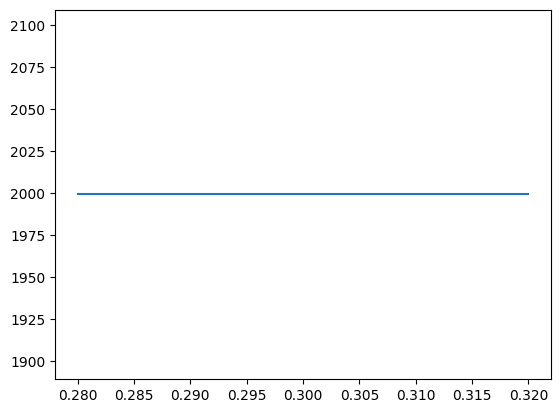

In [8]:
# Plot learning rates vs iterations until convergence

plt.plot(lrates, iterations_until_convergence, label='Iterations until convergence')

In [9]:
# Q1: For each learning rate in the given list, the number of iterations is larger than 2000?
check = [i > 2000 for i in iterations_until_convergence]

# Q2: For each learning rate in the given list, the number of iterations is smaller than 2000?
